In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
from keras.layers import *
from keras.models import Sequential 
import keras.preprocessing.image as image
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path  = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [3]:
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/test')
image_classes

['Normal', 'Viral Pneumonia', 'Covid']

In [4]:
# visualization 
def plot_images (image_classes) :
    plt.figure(figsize=(12,12))
    for i , category in enumerate (image_classes) :
        image_path = train_path + '/' + category   # '/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal'
        image_in_folder = os.listdir(image_path)
        
        first_image = image_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255 
        
        plt.subplot(1,3, i+1)
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(category)
    plt.show()

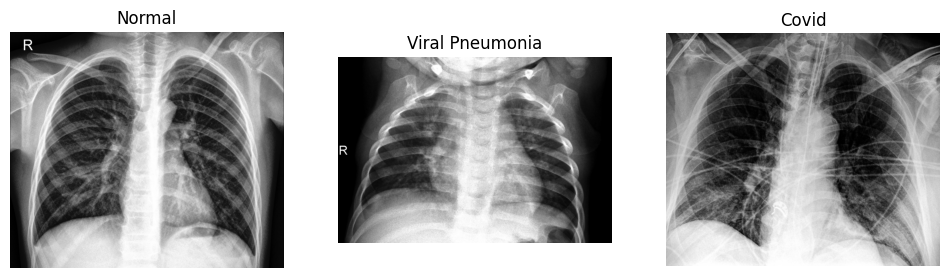

In [5]:
plot_images(image_classes)

In [6]:
# image preprocessing with image data generator 
data_generator = ImageDataGenerator(rescale = 1/255)

In [7]:
train_data = data_generator.flow_from_directory(train_path ,
                                                target_size = (224,224),
                                                batch_size = 16)

Found 251 images belonging to 3 classes.


In [8]:
test_data = data_generator.flow_from_directory(test_path,
                                              target_size=(224,224),
                                              batch_size = 2)

Found 66 images belonging to 3 classes.


In [18]:
# build CNN model 
model = Sequential()
# add convlutional layer
model.add(Conv2D(filters= 32 , kernel_size = 3 , padding = 'same' ,
                activation = 'relu' , input_shape = [224,224,3]))
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add convlutional layer
model.add(Conv2D(filters= 32 , kernel_size = 3 , padding = 'same' ,
                activation = 'relu' ))
# add pooling layer
model.add(MaxPooling2D())

# add convlutional layer
model.add(Conv2D(filters= 32 , kernel_size = 3 , padding = 'same' ,
                activation = 'relu' ))
# add pooling layer
model.add(MaxPooling2D())

model.add(Dropout(0.2))

# add Flatten layer
model.add(Flatten())
# add fully connceted layers 
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

# add output layer
model.add(Dense(3,activation = 'softmax'))

In [19]:
model.compile(optimizer= 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,247,683 (12.39 MB)

 Trainable params: 3,247,683 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Fit the model 
model_history = model.fit(train_data ,
                          epochs = 8,
                          validation_data = test_data)

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.5583 - loss: 1.4163 - val_accuracy: 0.6667 - val_loss: 0.6270
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.8327 - loss: 0.3720 - val_accuracy: 0.8636 - val_loss: 0.4000
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.9161 - loss: 0.2234 - val_accuracy: 0.7273 - val_loss: 0.4424
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.9508 - loss: 0.1364 - val_accuracy: 0.9545 - val_loss: 0.1680
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.9827 - loss: 0.0910 - val_accuracy: 0.8485 - val_loss: 0.3165
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9948 - loss: 0.0437 - val_accuracy: 0.9242 - val_loss: 0.2194
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.9852 - loss: 0.0302 - val_accuracy: 0.9394 - val_loss: 0.1507
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.9854 - loss: 0.0397 - val_accuracy: 0.9091 - 

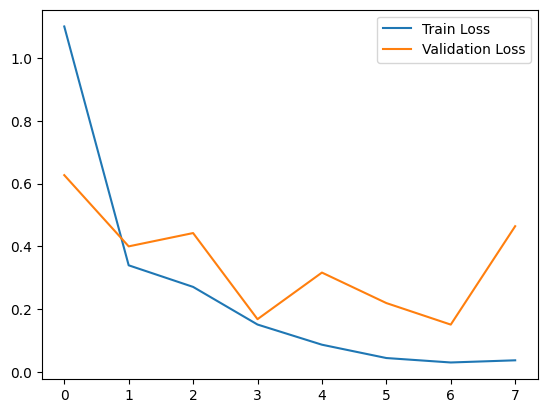

In [22]:
# visualize loss
plt.plot(model_history.history['loss'] , label = 'Train Loss')
plt.plot(model_history.history['val_loss'] , label = 'Validation Loss')
plt.legend()
plt.show()

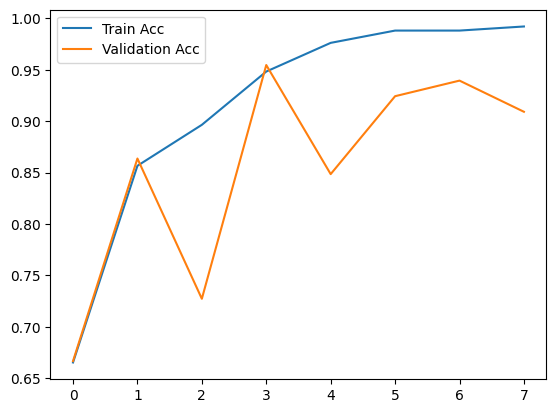

In [23]:
# visualize accuracy 
plt.plot(model_history.history['accuracy'] , label = 'Train Acc')
plt.plot(model_history.history['val_accuracy'] , label = 'Validation Acc')
plt.legend()

In [24]:
# evaluate model
model.evaluate(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9174 - loss: 0.3974


[0.46426963806152344, 0.9090909361839294]

In [25]:
model.save('Covid19_Model.h5')